In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('Datasets/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
numeric_data = titanic_data.select_dtypes(include=[np.number])

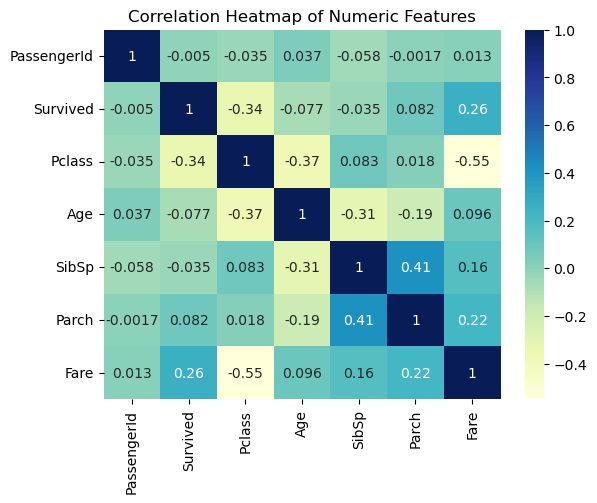

In [6]:
sns.heatmap(numeric_data.corr(), cmap='YlGnBu', annot=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2)
for train_indecies, test_indecies in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indecies]
    strat_test_set = titanic_data.loc[test_indecies]

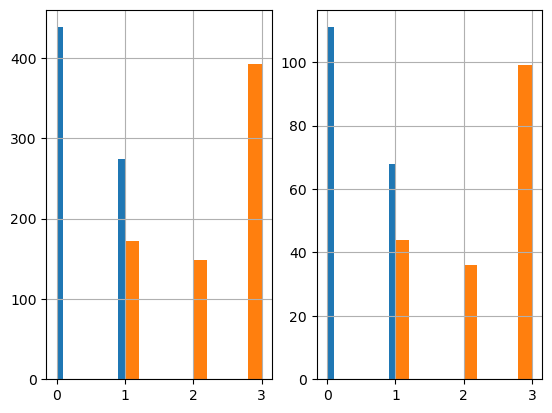

In [8]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 737 to 870
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Male", "Female"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [12]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageImputer", AgeImputer()),
                     ("featureEncoder", FeatureEncoder()),
                    ("featureDropper", FeatureDropper())])

In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 737 to 870
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [15]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [17]:
strat_train_set.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
737,738,1,1,35.000000,0,0,512.3292,1.0,0.0,0.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
547,548,1,2,29.970435,0,0,13.8625,1.0,0.0,0.0,0.0,1.0
205,206,0,3,2.000000,0,1,10.4625,0.0,0.0,1.0,1.0,0.0
571,572,1,1,53.000000,2,0,51.4792,0.0,0.0,1.0,1.0,0.0
229,230,0,3,29.970435,3,1,25.4667,0.0,0.0,1.0,1.0,0.0
441,442,0,3,20.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
665,666,0,2,32.000000,2,0,73.5000,0.0,0.0,1.0,0.0,1.0
108,109,0,3,38.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
116,117,0,3,70.500000,0,0,7.7500,0.0,1.0,0.0,0.0,1.0


In [18]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [19]:
X_data

array([[ 1.13675944, -1.56828591,  0.38635742, ..., -1.65751875,
        -0.73561236,  0.73561236],
       [ 1.72263591, -1.56828591, -0.84271875, ...,  0.60331142,
         1.35941164, -1.35941164],
       [ 0.39464924, -0.37019624,  0.        , ..., -1.65751875,
        -0.73561236,  0.73561236],
       ...,
       [-0.07014609,  0.82789342,  0.        , ..., -1.65751875,
        -0.73561236,  0.73561236],
       [ 1.31642822,  0.82789342,  0.        , ...,  0.60331142,
        -0.73561236,  0.73561236],
       [ 1.65623658,  0.82789342, -0.30499792, ...,  0.60331142,
        -0.73561236,  0.73561236]])

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [24]:
final_clf = grid_search.best_estimator_

In [25]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [26]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [27]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
872,873,0,1,33.000000,0,0,5.0000,0.0,0.0,1.0,0.0,1.0
857,858,1,1,51.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
278,279,0,3,7.000000,4,1,29.1250,0.0,1.0,0.0,0.0,1.0
643,644,1,3,28.576763,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
569,570,1,3,32.000000,0,0,7.8542,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,290,1,3,22.000000,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
18,19,0,3,31.000000,1,0,18.0000,0.0,0.0,1.0,1.0,0.0
524,525,0,3,28.576763,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
528,529,0,3,39.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0


In [30]:
X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [31]:
final_clf.score(X_data_test, y_data_test)

0.8100558659217877

In [32]:
final_data = pipeline.fit_transform(titanic_data)

In [33]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [34]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [35]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [36]:
prod_final_clf = grid_search.best_estimator_

In [37]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [38]:
titanic_test_data = pd.read_csv('Datasets/test.csv')

In [39]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [40]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [41]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Male         418 non-null    float64
 10  Female       418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [45]:
X_final_test = final_test_data
X_final_test = X_final_test.ffill()

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [46]:
predictions = prod_final_clf.predict(X_data_final_test)

In [48]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('Datasets/Predictions.csv', index = False)

In [49]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
